In [25]:
from datetime import datetime
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [11]:
NBA = pd.read_csv("https://raw.githubusercontent.com/Johnyrudder/MDA-620/main/main_df.csv")
NBA

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,San Antonio Spurs*,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,...,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4,1980
1,2,Los Angeles Lakers*,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,...,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,1980
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,...,15.9,29.0,45.0,25.7,9.3,4.2,16.7,23.6,114.1,1980
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,...,15.1,28.1,43.2,27.6,10.7,5.6,19.7,26.4,114.0,1980
4,5,Boston Celtics*,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,...,15.0,30.0,44.9,26.8,9.9,3.8,18.8,24.1,113.5,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,26,Miami Heat,82,240.6,39.6,88.0,0.450,11.3,32.4,0.349,...,11.2,35.1,46.3,24.3,7.6,5.5,14.7,20.9,105.7,2019
1100,27,Chicago Bulls,82,242.7,39.8,87.9,0.453,9.1,25.9,0.351,...,8.8,34.1,42.9,21.9,7.4,4.3,14.1,20.3,104.9,2019
1101,28,New York Knicks,82,241.2,38.2,88.3,0.433,10.0,29.5,0.340,...,10.5,34.3,44.7,20.1,6.8,5.1,14.0,20.9,104.6,2019
1102,29,Cleveland Cavaliers,82,240.9,38.9,87.6,0.444,10.3,29.1,0.355,...,10.7,31.9,42.7,20.7,6.5,2.4,13.5,20.0,104.5,2019


In [12]:
NBA.columns

Index(['Rk', 'Team', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'Year'],
      dtype='object')

In [13]:
print("Statistical High and Low Season Summary")
print()
print("PPG:")
print("High:",(year_ave['PTS'].idxmax()),"Low:",(year_ave['PTS'].idxmin()))

print()
print("FGA:")
print("High:",(year_ave['FGA'].idxmax()),"Low:",(year_ave['FGA'].idxmin()))

print()
print("Field Goals Made:")
print("High:",(year_ave['FG'].idxmax()),"Low:",(year_ave['FG'].idxmin()))


print()
print("2 Point Attempts:")
print("High:",(year_ave['2PA'].idxmax()),"Low:",(year_ave['2PA'].idxmin()))

print()
print("2 Pointers Made:")
print("High:",(year_ave['2P'].idxmax()),"Low:",(year_ave['2P'].idxmin()))

print()
print("3 Point Attempts:")
print("High:",(year_ave['3PA'].idxmax()),"Low:",(year_ave['3PA'].idxmin()))

print()
print("3 Pointers Made:")
print("High:",(year_ave['3P'].idxmax()),"Low:",(year_ave['3P'].idxmin()))


Statistical High and Low Season Summary

PPG:
High: 2019 Low: 1999

FGA:
High: 1980 Low: 1999

Field Goals Made:
High: 1985 Low: 1999

2 Point Attempts:
High: 1980 Low: 2018

2 Pointers Made:
High: 1983 Low: 2018

3 Point Attempts:
High: 2019 Low: 1981

3 Pointers Made:
High: 2019 Low: 1981


In [14]:
(NBA.groupby("Team").mean()).round(2)

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
Team,,,,,,,,,,,,,,,,,,,,,
Atlanta Hawks,19.64,82.00,241.91,37.77,83.28,0.45,4.63,13.49,0.32,33.15,...,12.90,29.81,42.74,21.57,7.92,4.97,16.39,23.03,99.48,2000.93
Atlanta Hawks*,16.69,80.15,241.62,38.28,82.88,0.46,4.82,13.82,0.32,33.47,...,12.84,29.79,42.65,22.75,8.36,5.30,15.25,21.59,101.30,1998.73
Boston Celtics,13.50,78.80,241.92,36.80,82.64,0.45,5.53,15.78,0.35,31.30,...,12.45,28.72,41.17,21.47,8.76,4.54,15.93,24.26,97.78,2001.20
Boston Celtics*,11.10,81.43,241.59,40.45,84.51,0.48,4.76,13.54,0.33,35.69,...,11.71,31.35,43.04,24.89,8.18,5.07,15.51,22.10,105.37,1998.93
Brooklyn Nets,17.33,82.00,241.30,38.07,85.47,0.45,9.97,28.57,0.35,28.13,...,9.67,33.93,43.57,22.47,7.00,4.50,15.50,19.87,103.67,2017.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vancouver Grizzlies,23.83,76.67,242.03,34.68,78.82,0.44,4.15,11.98,0.35,30.53,...,12.27,27.68,39.93,21.77,7.88,4.45,16.48,22.10,91.68,1998.50
Washington Bullets,17.50,82.00,241.62,40.97,87.47,0.47,2.14,6.75,0.28,38.85,...,13.44,28.73,42.17,24.44,7.97,4.91,16.42,23.24,102.99,1990.40
Washington Bullets*,18.62,82.00,241.99,41.29,87.86,0.47,1.26,4.46,0.26,40.02,...,13.76,29.80,43.56,24.01,7.96,5.88,16.50,23.06,104.08,1986.12


In [15]:
year_ave = (NBA.groupby("Year").mean()).round(2) ##Subsetting the data by creating a df with the average stats per year 
year_ave

,Rk,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Year,,,,,,,,,,,,,,,,,,,,,
1980,11.5,82.00,241.80,43.64,90.65,0.48,0.77,2.77,0.26,42.85,...,0.76,15.07,29.88,44.94,25.80,9.41,5.31,18.93,24.37,109.34
1981,12.0,82.00,241.41,42.96,88.43,0.49,0.50,2.02,0.23,42.47,...,0.75,14.54,28.94,43.49,25.48,9.00,5.32,18.75,25.06,108.10
1982,12.0,82.00,241.59,43.33,88.22,0.49,0.61,2.29,0.25,42.73,...,0.74,14.33,29.14,43.47,25.14,8.54,5.37,17.74,26.17,108.59
1983,12.0,82.00,241.28,43.53,89.66,0.49,0.53,2.25,0.23,42.99,...,0.74,14.83,29.63,44.46,25.91,8.88,5.60,19.10,25.65,108.51
1984,12.0,82.00,242.03,43.49,88.36,0.49,0.60,2.37,0.24,42.88,...,0.76,14.20,28.83,43.03,26.20,8.51,5.31,17.90,25.75,110.12
1985,12.0,82.00,241.41,43.77,89.10,0.49,0.89,3.14,0.27,42.88,...,0.76,14.32,29.17,43.49,26.26,8.55,5.33,17.87,24.93,110.84
1986,12.0,82.00,241.57,43.20,88.63,0.49,0.95,3.34,0.27,42.26,...,0.76,14.13,29.43,43.57,26.02,8.79,5.24,17.84,25.21,110.22
1987,12.0,82.00,241.54,42.64,88.80,0.48,1.42,4.73,0.29,41.22,...,0.76,14.70,29.33,44.02,25.97,8.63,5.52,16.99,24.53,109.94
1988,12.0,82.00,241.25,42.13,87.72,0.48,1.58,4.99,0.31,40.56,...,0.77,14.23,29.17,43.39,25.77,8.51,5.38,16.73,24.10,108.16


Text(0.5, 1.0, 'Points per Game by Year')

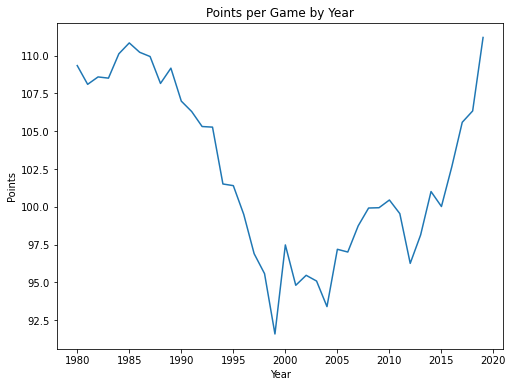

In [16]:
plt.figure(figsize = (8,6))  #Points per game plot 
year_ave['PTS'].plot()
plt.xlabel("Year")
plt.ylabel("Points")
plt.title("Points per Game by Year")

Text(0.5, 1.0, 'Points per Game')

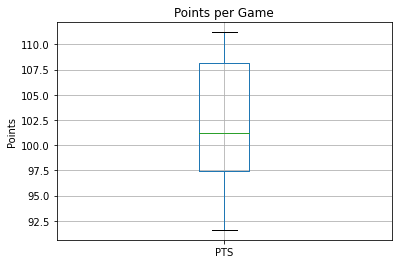

In [17]:
year_ave.boxplot(column=['PTS'], return_type='axes') ##boxplot for points per game
plt.ylabel("Points")
plt.title("Points per Game")

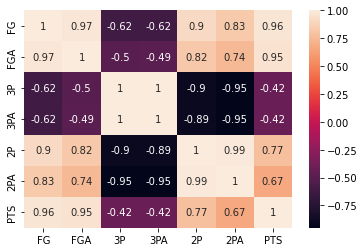

In [18]:
import seaborn as sns
 
stat_corr= year_ave[['FG', 'FGA','3P', '3PA', '2P','2PA','PTS']]
#plotting the heatmap for correlation
ax = sns.heatmap(stat_corr.corr(), annot=True)

In [22]:
Pts_makeup = year_ave.groupby('Year')['FT','2P','3P'].sum()

C:\Users\jonir\AppData\Local\Temp\ipykernel_12568\3927264345.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Pts_makeup = year_ave.groupby('Year')['FT','2P','3P'].sum()


AxesSubplot(0.260833,0.125;0.503333x0.755)


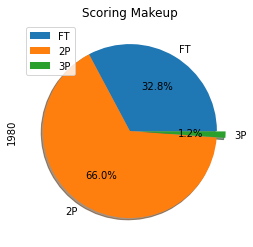

In [23]:
print(Pts_makeup.iloc[0].plot.pie(title = 'Scoring Makeup', legend = True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0 ))

AxesSubplot(0.260833,0.125;0.503333x0.755)


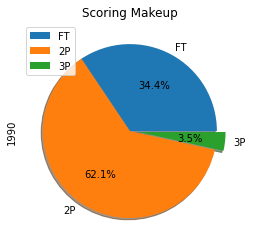

In [24]:
print(Pts_makeup.iloc[10].plot.pie(title = 'Scoring Makeup', legend = True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0 ))

AxesSubplot(0.260833,0.125;0.503333x0.755)


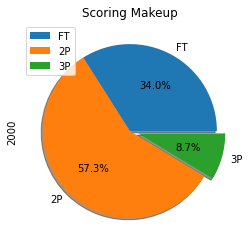

In [192]:
print(Pts_makeup.iloc[20].plot.pie(title = 'Scoring Makeup', legend = True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0))

AxesSubplot(0.260833,0.125;0.503333x0.755)


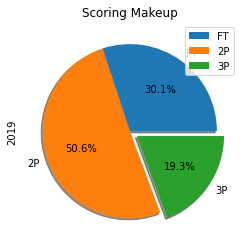

In [191]:
print(Pts_makeup.iloc[-1].plot.pie(title = 'Scoring Makeup', legend = True, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0))

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\2760148958.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FG_PTS = year_ave.groupby(['Year'])['FG', 'PTS'].sum() ##grouping total Field goal attempts and pts per game by year


Text(0.5, 1.0, 'Field Goals Made and Points Per Game')

<Figure size 576x432 with 0 Axes>

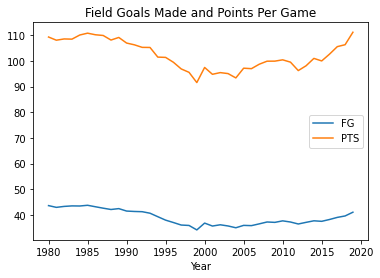

In [107]:
FG_PTS = year_ave.groupby(['Year'])['FG', 'PTS'].sum() ##grouping total Field goal attempts and pts per game by year
plt.figure(figsize = (8,6))  ##plot
FG_PTS.plot()
plt.title("Field Goals Made and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\927202548.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FGA_PTS = year_ave.groupby(['Year'])['FGA', 'PTS'].sum() ##grouping total Field goalattempts and pts per game by year


Text(0.5, 1.0, 'Field Goals Made and Points Per Game')

<Figure size 576x432 with 0 Axes>

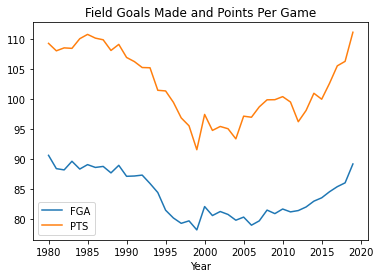

In [198]:
FGA_PTS = year_ave.groupby(['Year'])['FGA', 'PTS'].sum() ##grouping total Field goalattempts and pts per game by year
plt.figure(figsize = (8,6))  ##plot
FGA_PTS.plot()
plt.title("Field Goal Attempts and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\333581774.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  TWOPA_PTS = year_ave.groupby(['Year'])['2PA', 'PTS'].sum() ##grouping 2 point Field goal attempts and pts per game by year


Text(0.5, 1.0, 'Two Point Attempts and Points Per Game')

<Figure size 576x432 with 0 Axes>

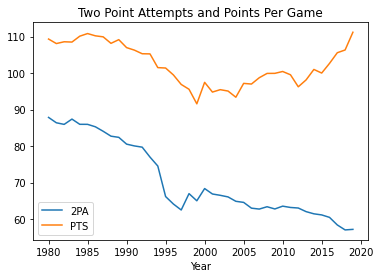

In [108]:
TWOPA_PTS = year_ave.groupby(['Year'])['2PA', 'PTS'].sum() ##grouping 2 point Field goal attempts and pts per game by year
plt.figure(figsize = (8,6))  ##plot
TWOPA_PTS.plot()
plt.title("Two Point Attempts and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\3478378945.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Twos_PTS = year_ave.groupby(['Year'])['2P', 'PTS'].sum() ##grouping 2 pointers made and pts per game by year


Text(0.5, 1.0, 'Two Pointers Made and Points Per Game')

<Figure size 576x432 with 0 Axes>

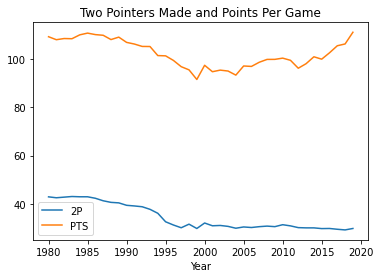

In [110]:
Twos_PTS = year_ave.groupby(['Year'])['2P', 'PTS'].sum() ##grouping 2 pointers made and pts per game by year
plt.figure(figsize = (8,6))  ##plot
Twos_PTS.plot()
plt.title("Two Pointers Made and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\3513135038.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ThreePA_PTS = year_ave.groupby(['Year'])['3PA', 'PTS'].sum() ##grouping 3 point Field goal attempts and pts per game by year


Text(0.5, 1.0, 'Three Point Attempts and Points Per Game')

<Figure size 576x432 with 0 Axes>

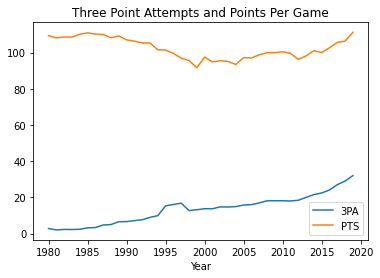

In [111]:
ThreePA_PTS = year_ave.groupby(['Year'])['3PA', 'PTS'].sum() ##grouping 3 point Field goal attempts and pts per game by year
plt.figure(figsize = (8,6))  ##3PA to PTS plot
ThreePA_PTS.plot()
plt.title("Three Point Attempts and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\3310027104.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Threes_threePA = year_ave.groupby(['Year'])['3P', '3PA'].sum() ##grouping 3 point Field goal attempts and 3 pointers made per game by year


Text(0.5, 1.0, 'Three Pointers Made and Points Per Game')

<Figure size 576x432 with 0 Axes>

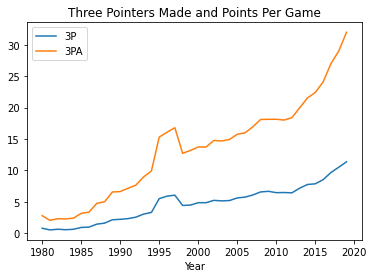

In [112]:
Threes_threePA = year_ave.groupby(['Year'])['3P', '3PA'].sum() ##grouping 3 point Field goal attempts and 3 pointers made per game by year
plt.figure(figsize = (8,6))  ##3PA to threes made plot
Threes_threePA.plot()
plt.title("Three Pointers Made and Points Per Game")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\1918349632.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Points_Def = year_ave.groupby(['Year'])['TOV','STL','BLK'].sum() ##defensive metrics


Text(0.5, 1.0, 'Defensive Metrics')

<Figure size 576x432 with 0 Axes>

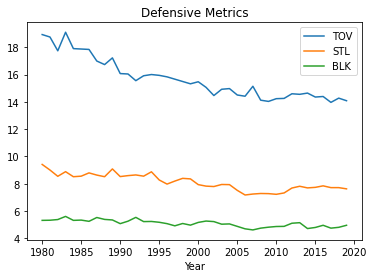

In [113]:
Points_Def = year_ave.groupby(['Year'])['TOV','STL','BLK'].sum() ##defensive metrics
plt.figure(figsize = (8,6))  ##plot
Points_Def.plot()
plt.title("Defensive Metrics")

C:\Users\jonir\AppData\Local\Temp\ipykernel_22620\1460513046.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  FT_PTS = year_ave.groupby(['Year'])['FT','FTA'].sum() ##defensive metrics


Text(0.5, 1.0, 'Free Throw Attempts and Free Throws Made')

<Figure size 576x432 with 0 Axes>

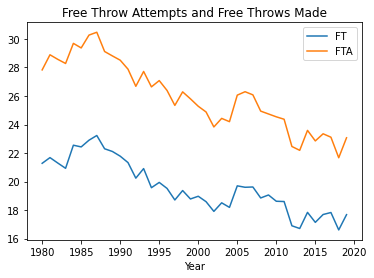

In [114]:
FT_PTS = year_ave.groupby(['Year'])['FT','FTA'].sum() ##defensive metrics
plt.figure(figsize = (8,6))  ##plot
FT_PTS.plot()
plt.title("Free Throw Attempts and Free Throws Made")

In [160]:
NBA

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,San Antonio Spurs*,82,240.9,47.0,94.4,0.498,0.6,2.5,0.252,...,14.1,30.7,44.7,28.4,9.4,4.1,19.4,25.6,119.4,1980
1,2,Los Angeles Lakers*,82,242.4,47.5,89.9,0.529,0.2,1.2,0.200,...,13.2,32.4,45.6,29.4,9.4,6.7,20.0,21.8,115.1,1980
2,3,Cleveland Cavaliers,82,243.0,46.5,98.1,0.474,0.4,2.3,0.193,...,15.9,29.0,45.0,25.7,9.3,4.2,16.7,23.6,114.1,1980
3,4,New York Knicks,82,241.2,46.4,93.6,0.496,0.5,2.3,0.220,...,15.1,28.1,43.2,27.6,10.7,5.6,19.7,26.4,114.0,1980
4,5,Boston Celtics*,82,242.4,44.1,90.1,0.490,2.0,5.1,0.384,...,15.0,30.0,44.9,26.8,9.9,3.8,18.8,24.1,113.5,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,26,Miami Heat,82,240.6,39.6,88.0,0.450,11.3,32.4,0.349,...,11.2,35.1,46.3,24.3,7.6,5.5,14.7,20.9,105.7,2019
1100,27,Chicago Bulls,82,242.7,39.8,87.9,0.453,9.1,25.9,0.351,...,8.8,34.1,42.9,21.9,7.4,4.3,14.1,20.3,104.9,2019
1101,28,New York Knicks,82,241.2,38.2,88.3,0.433,10.0,29.5,0.340,...,10.5,34.3,44.7,20.1,6.8,5.1,14.0,20.9,104.6,2019
1102,29,Cleveland Cavaliers,82,240.9,38.9,87.6,0.444,10.3,29.1,0.355,...,10.7,31.9,42.7,20.7,6.5,2.4,13.5,20.0,104.5,2019
